In [14]:
import sys

sys.path.append("..")
import matplotlib

matplotlib.use("agg")
import mne
from config import ica_epoch_path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
# fmt:off
picks_f = ["Fpz", "Fp1", "Fp2", "AF7", "AF3", "AF4", "AF8"]
picks_r = ["FT8", "T8", "TP8", "FC6", "C6", "CP6"]
picks_l = ["FT7", "T7", "TP7", "FC5", "C5", "CP5"]
picks_b = ["Oz", "POz", "PO8", "PO3", "O1", "O9", "O2", "O10", "PO7"]
# fmt:on


In [38]:
class EpochReader:
    def __init__(self) -> None:
        self.loaded = {}

    def read(self, path) -> mne.epochs.EpochsFIF:
        if path in self.loaded.keys():
            print("using cached data")
            return self.loaded[path]
        epoch = mne.read_epochs(path)
        self.loaded[path] = epoch
        return epoch

In [43]:
bin1 = ("0", "1")
bin2 = ("2", "3", "4")
bin3 = ("5", "6")
er = EpochReader()


def evoked_per_bin(part_ids, bins, conditions):
    combined_evoked = []
    for bin in bins:
        all_evoked = []
        for part_id in part_ids:
            path = ica_epoch_path(part_id)
            epochs = er.read(path)
            ave = epochs["probe_tone"][conditions][bin].average()
            all_evoked.append(ave)

        avg = mne.combine_evoked(all_evoked, weights="equal")
        combined_evoked.append(avg)
    return combined_evoked

In [44]:
bin1 = ("0", "1")
bin2 = ("2", "3", "4")
bin3 = ("5", "6")
bins = bin1, bin2, bin3

part_m_ids = ["m01", "m02", "m03", "m04", "m05", "m06"]
part_nm_ids = ["nm01", "nm02", "nm03", "nm04"]

In [ ]:
mucisians_move = evoked_per_bin(part_m_ids, bins, "move")
mucisians_no_move = evoked_per_bin(part_m_ids, bins, "no_move")
mucisians_all = evoked_per_bin(part_m_ids, bins, ("move", "no_move"))

no_mucisians_move = evoked_per_bin(part_nm_ids, bins, "move")
no_mucisians_no_move = evoked_per_bin(part_nm_ids, bins, "no_move")
no_mucisians_all = evoked_per_bin(part_nm_ids, bins, ("move", "no_move"))

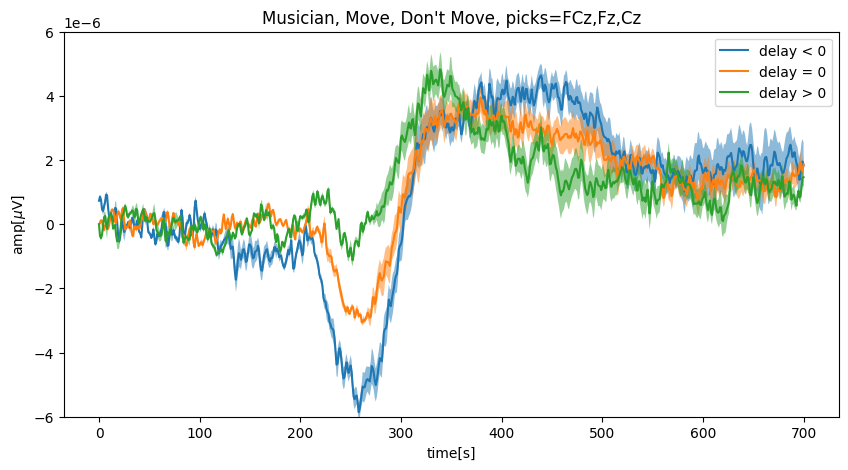

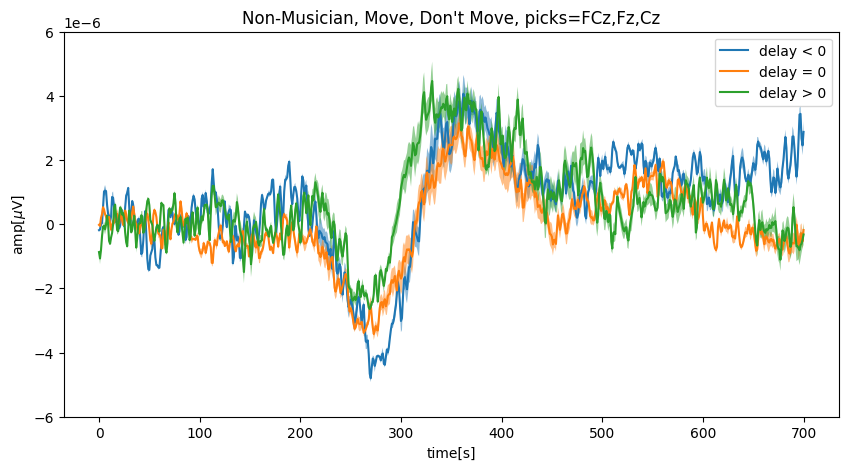

In [46]:
def plot(evoked, picks):
    alpha = 0.5
    for bin, label in zip(evoked, "<=>"):
        if picks is None:
            bin_data = bin.get_data()
        else:
            bin_data = bin.get_data(picks=picks)
        mean = bin_data.mean(axis=0)
        std = bin_data.std(axis=0, ddof=1) / np.sqrt(len(picks))
        plt.plot(mean, label=f"delay {label} 0")
        plt.fill_between(range(mean.shape[0]), mean - std, mean + std, alpha=alpha)
    plt.xlabel("time[s]")
    plt.ylabel(r"amp[$\mu$V]")
    plt.ylim([-6 * 1e-6, 6 * 1e-6])
    plt.legend()


plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(mucisians_all, picks)
plt.title(f"Musician, Move, Don't Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_mucisians_all, picks)
plt.title(f"Non-Musician, Move, Don't Move, picks={','.join(picks)}")
plt.show()

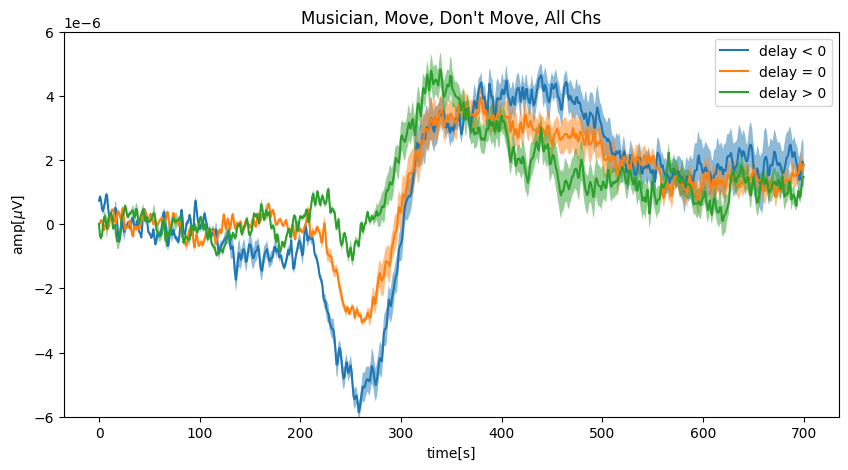

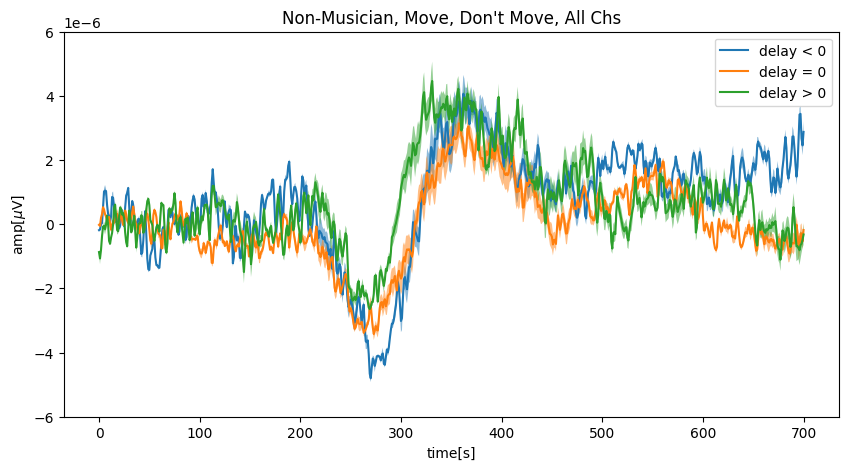

In [27]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(combined_evoked_m, picks)
plt.title(f"Musician, Move, Don't Move, All Chs")
plt.show()

plt.figure(figsize=(10, 5))
plot(combined_evoked_nm, picks)
plt.title(f"Non-Musician, Move, Don't Move, All Chs")
plt.show()

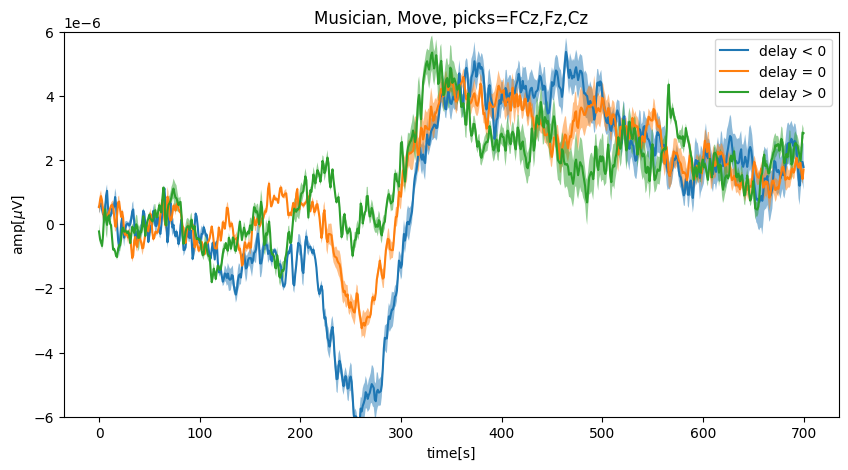

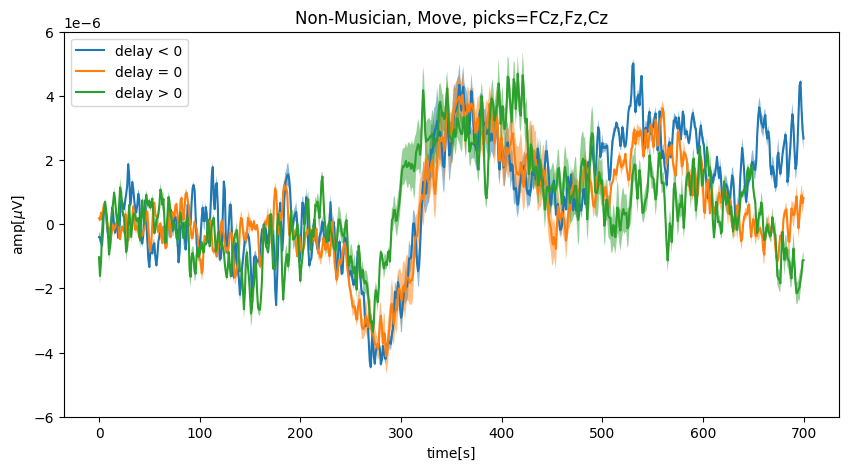

In [47]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(mucisians_move, picks)
plt.title(f"Musician, Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_mucisians_move, picks)
plt.title(f"Non-Musician, Move, picks={','.join(picks)}")
plt.show()

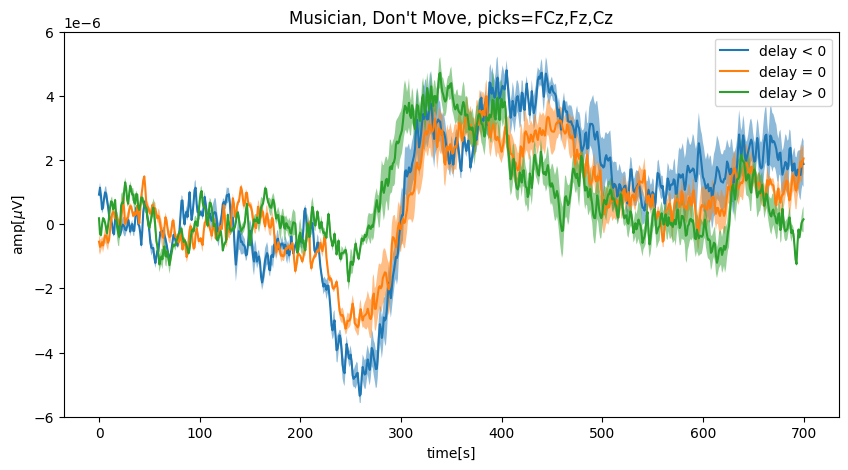

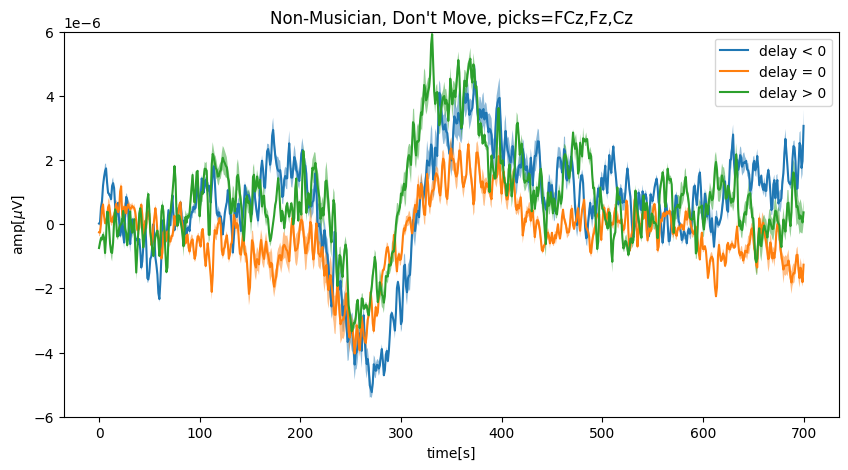

In [48]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(mucisians_no_move, picks)
plt.title(f"Musician, Don't Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_mucisians_no_move, picks)
plt.title(f"Non-Musician, Don't Move, picks={','.join(picks)}")
plt.show()